In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [83]:
dataset = pd.read_csv('Mall_Customers.csv')

In [84]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [85]:
X=dataset.iloc[:,[3,4]].values

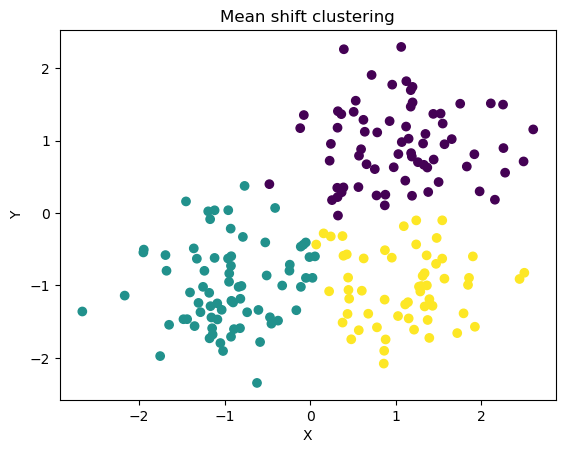

In [93]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=200, centers=centers, cluster_std=0.6)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_  
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Mean shift clustering")
plt.xlabel('X') 
plt.ylabel('Y')  
plt.show()

In [94]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=2)
ms.fit(X)
y_ms = ms.fit_predict(X)

In [95]:
supervised=dataset

In [96]:
supervised['Cluster_group']=y_ms
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,0
198,199,Male,32,137,18,0


In [97]:
supervised.to_csv('Mall_Customers.csv',index=False)

In [98]:
cluster_centers = ms.cluster_centers_

/Users/vidhya/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


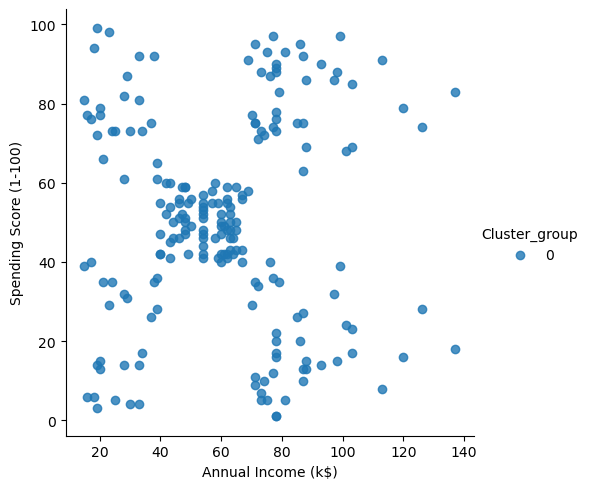

In [99]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True)